In [1]:
! pip install -q -U langgraph langchain_core langchain-google-genai

In [8]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import RemoveMessage,trim_messages,HumanMessage,AIMessage
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph import START,END,StateGraph,MessagesState
from IPython.display import Image,display
from dotenv import load_dotenv
import os


load_dotenv()

google_api= os.getenv('GEMINI_API_KEY')


llm:ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model='gemini-1.5-flash',api_key=google_api)




In [7]:
messages = [AIMessage('So you said you were researching ocean mammals?',name='Bot')]
messages.append(HumanMessage('Yes, I know about whales. But what others should I learn about?',name='Lance'))

for n in messages:
    n.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?


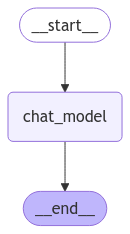

In [9]:
def chat_model(state:MessagesState):
    return {"messages":llm.invoke(state['messages'])}

builder: StateGraph = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph: CompiledStateGraph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
result = graph.invoke({'messages':messages})
for n in result['messages']:
    n.pretty_print()

{'messages': [AIMessage(content='So you said you were researching ocean mammals?', additional_kwargs={}, response_metadata={}, name='Bot', id='754e2276-8e0c-4deb-b4b4-6e9fafa5302c'), HumanMessage(content='Yes, I know about whales. But what others should I learn about?', additional_kwargs={}, response_metadata={}, name='Lance', id='08f52b15-0987-450c-ac45-491cbd919bfb'), AIMessage(content="That's great you're interested in ocean mammals! Whales are a fascinating group, but there's a whole underwater world beyond them.  To suggest other groups to learn about, it helps to know what aspects of whales interest you.  For example, do you like their:\n\n* **Size and behavior?**  Then you might enjoy learning about other large marine mammals like walruses and elephant seals.  Their social structures and adaptations to extreme environments are captivating.\n\n* **Intelligence and social complexity?**  Dolphins (including orcas, which are technically dolphins!) are renowned for their intelligence